# EDA: NASA - Nearest Earth Objects
<img src="../assets/nasa.jpg" alt="Title-Pic">

# Imports

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from pandas import Series, DataFrame


np.set_printoptions(suppress=True)

sns.set(rc={"figure.figsize": (12, 7), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})
sns.set_palette("Set2")
warnings.filterwarnings('ignore')

# Data

In [2]:
df = pd.read_csv("../data/neo_v2.csv")
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


# Helper Functions & Constants

In [15]:
# columns
ID = "id"
NAME = "name"
EST_DIAMETER_MIN = "est_diameter_min"
EST_DIAMETER_MAX = "est_diameter_max"
REL_VELOCITY = "relative_velocity"
MISS_DISTANCE = "miss_distance"
ORBITING_BODY = "orbiting_body"
SENTRY_OBJECT = "sentry_object"
ABS_MAGNITUDE = "absolute_magnitude"
TARGET_HAZARDOUS = "hazardous"

# added columns
TARGET = "Target"

# constants
NUM_COLUMNS = df.drop(columns=[ID]).describe().columns

In [31]:
# target erstellen
def plot_target_relation(column_name):
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    ax1, ax2 = axes
    
    target_pvt = df.pivot_table(index=column_name, values=TARGET, aggfunc="mean").sort_index()

    sns.pointplot(x=TARGET, y=column_name, data=df, ax=ax1).set_title(f"Relation Hazardous and {column_name}")
    sns.regplot(x=target_pvt.index, y=target_pvt.to_numpy(), ci=False, line_kws={"color": "C1"}, scatter_kws={"alpha": 0.5}, ax=ax2).set_title(f"Linear Relation Hazardous and {column_name}")

In [32]:
def plot_target_relation_cat(column_name):
    g = sns.pointplot(x=column_name, y=TARGET, data=df)
    g.set_title(f"Relation Hazardous-Mean and {column_name}")
    g.tick_params(axis='x', rotation=45)

In [6]:
def plot_dist(column_name):
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    ax1, ax2 = axes
    
    title = f"Distribution of {column_name}"
    ax1.set_title(title)
    ax2.set_title(title)

    sns.boxplot(x=column_name, data=df, ax=ax1)
    df[column_name].hist(ax=ax2)

    print(f"Skew: \t {df[column_name].skew()}")

In [7]:
def plot_dist_cat(column_name):
    g = sns.countplot(x=column_name, data=df, color="C0")
    g.tick_params(axis='x', rotation=45)
    g.set_title(f"Distribution of {column_name}")

# Exploring the data

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [39]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [40]:
df.describe(include=["O"])

,name,orbiting_body
count,90836,90836
unique,27423,1
top,469219 Kamo`oalewa (2016 HO3),Earth
freq,43,90836


In [41]:
df.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [42]:
df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

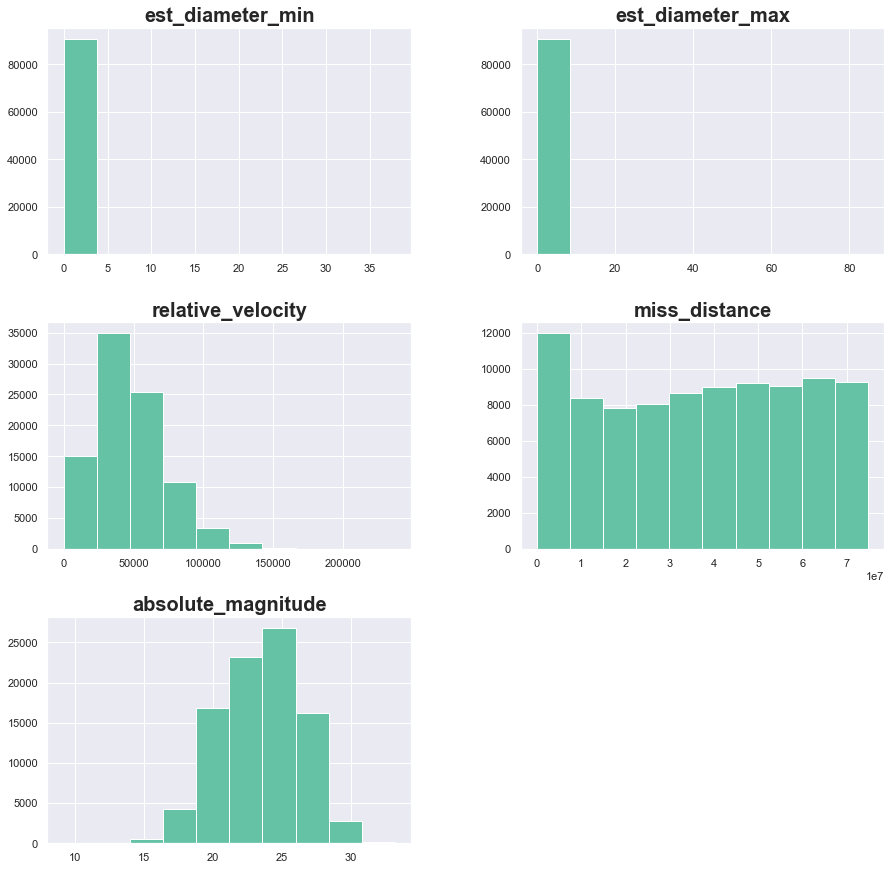

In [16]:
df[NUM_COLUMNS].hist(figsize=(15, 15));

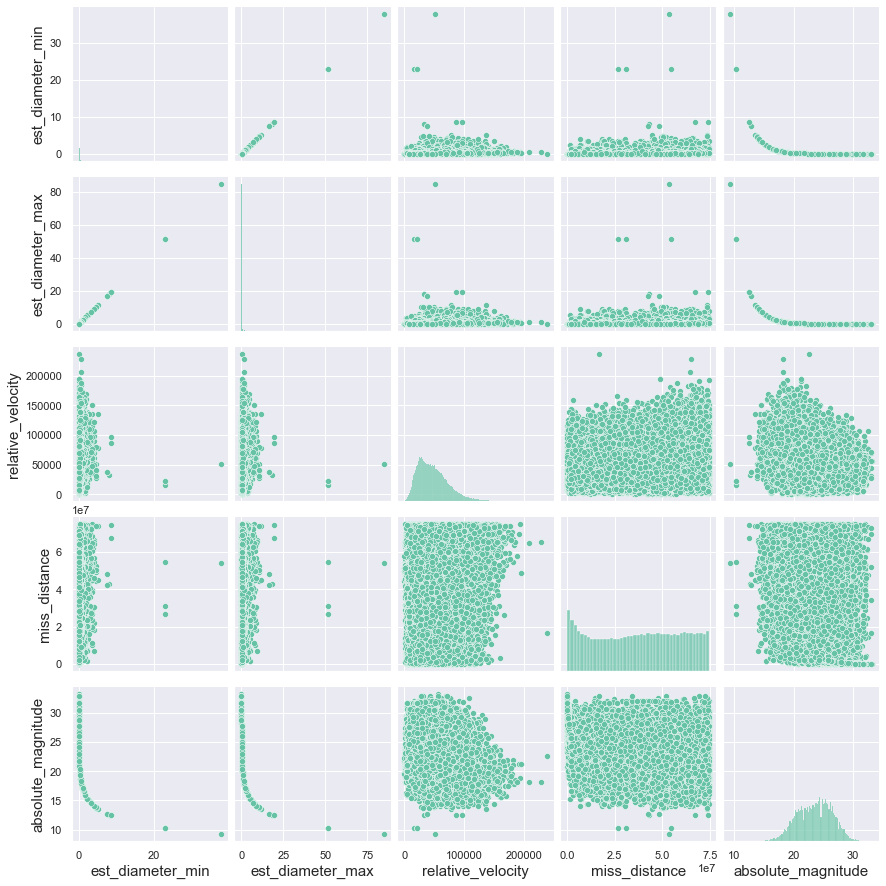

In [17]:
sns.pairplot(df[NUM_COLUMNS]);

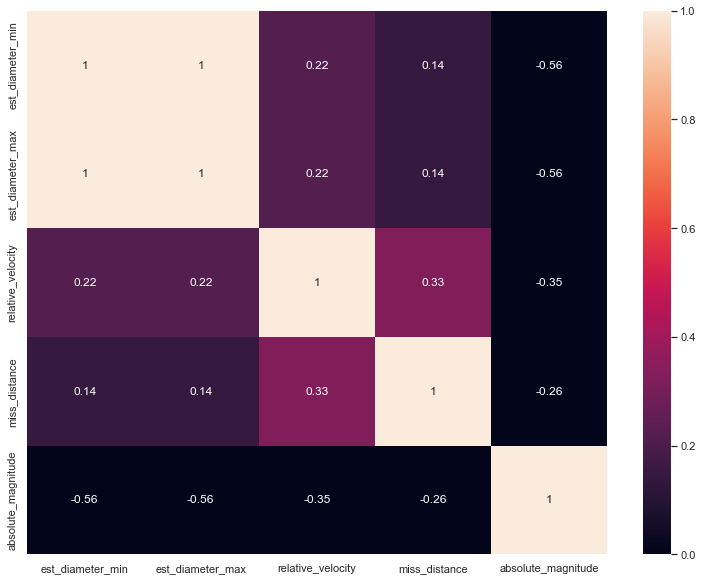

In [41]:
plt.figure(figsize=(13, 10))
sns.heatmap(df[NUM_COLUMNS].corr(), vmin=0, vmax=1, annot=True);

In [ ]:
###############################################################
#   EST_DIAMETER_MIN & EST_DIAMETER_MAX got a 100% correlation -> drop this
#   Detect skewed and very skewed numeric data
###############################################################

## Target

False    81996
True      8840
Name: hazardous, dtype: int64

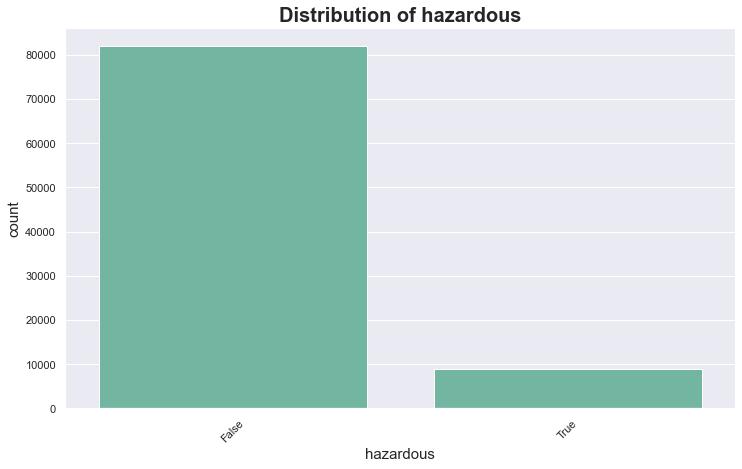

In [44]:
plot_dist_cat(TARGET_HAZARDOUS)
df[TARGET_HAZARDOUS].value_counts()

0    81996
1     8840
Name: Target, dtype: int64

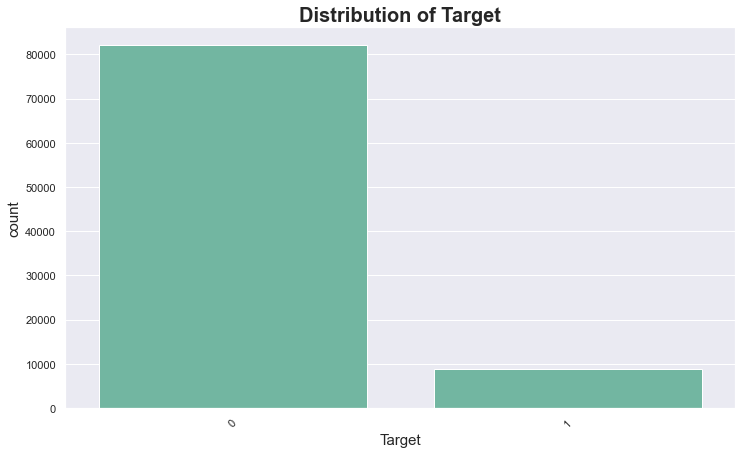

In [43]:
df[TARGET] = df[TARGET_HAZARDOUS].map({False: 0, True: 1})
plot_dist_cat(TARGET)
df[TARGET].value_counts()

In [ ]:
###############################################################
#   Oversample the Target by Borderline-SMOTE
###############################################################

## EST_DIAMETER_MIN

In [23]:
df[EST_DIAMETER_MIN].describe()

count    90836.000000
mean         0.127432
std          0.298511
min          0.000609
25%          0.019256
50%          0.048368
75%          0.143402
max         37.892650
Name: est_diameter_min, dtype: float64

In [47]:
df[EST_DIAMETER_MIN].sort_values(ascending=False).head(20)

36418    37.892650
56533    23.043847
37651    23.043847
12709    23.043847
72472     8.640820
16895     8.640820
21460     8.101305
59334     7.456843
54040     7.456843
60218     5.230642
19409     5.230642
53552     4.704950
63765     4.704950
18402     4.619075
1041      4.576727
1608      4.576727
71783     4.534767
40301     4.174024
5105      4.174024
4020      4.174024
Name: est_diameter_min, dtype: float64

Skew: 	 41.1399519487211


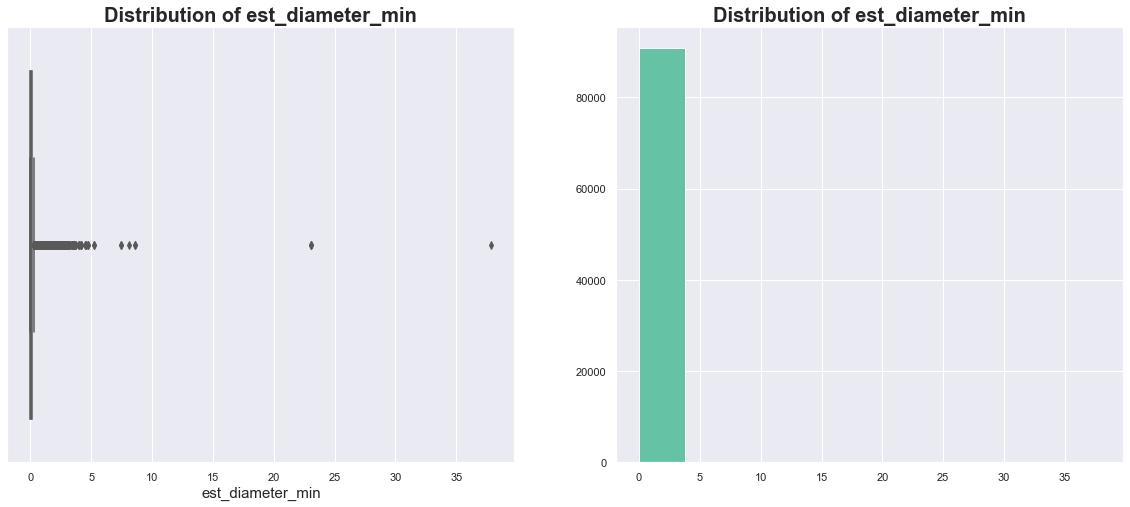

In [24]:
plot_dist(EST_DIAMETER_MIN)

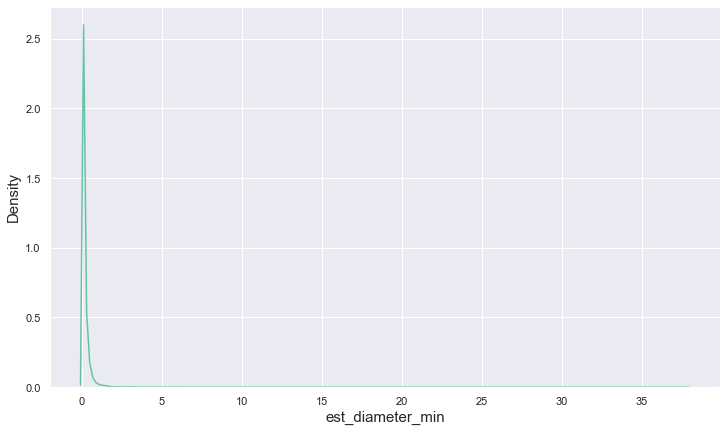

In [29]:
sns.kdeplot(x=EST_DIAMETER_MIN, data=df);

In [49]:
df.sort_values(by=EST_DIAMETER_MIN, ascending=False).head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
36418,2001036,1036 Ganymed (A924 UB),37.892650,84.730541,51496.923293,5.372124e+07,Earth,False,9.23,False
56533,2000433,433 Eros (A898 PA),23.043847,51.527608,21761.703426,3.120592e+07,Earth,False,10.31,False
37651,2000433,433 Eros (A898 PA),23.043847,51.527608,21402.705247,2.672952e+07,Earth,False,10.31,False
12709,2000433,433 Eros (A898 PA),23.043847,51.527608,15884.252623,5.468808e+07,Earth,False,10.31,False
72472,2001866,1866 Sisyphus (1972 XA),8.640820,19.321462,86394.013285,6.737501e+07,Earth,False,12.44,False
16895,2001866,1866 Sisyphus (1972 XA),8.640820,19.321462,96530.774890,7.402691e+07,Earth,False,12.44,False
21460,2004954,4954 Eric (1990 SQ),8.101305,18.115068,32852.598792,4.286086e+07,Earth,False,12.58,False
59334,2001627,1627 Ivar (1929 SH),7.456843,16.674007,37629.756403,4.810640e+07,Earth,False,12.76,False
54040,2001627,1627 Ivar (1929 SH),7.456843,16.674007,37802.191707,4.248551e+07,Earth,False,12.76,False
60218,2002212,2212 Hephaistos (1978 SB),5.230642,11.696071,135956.251475,4.478821e+07,Earth,False,13.53,False


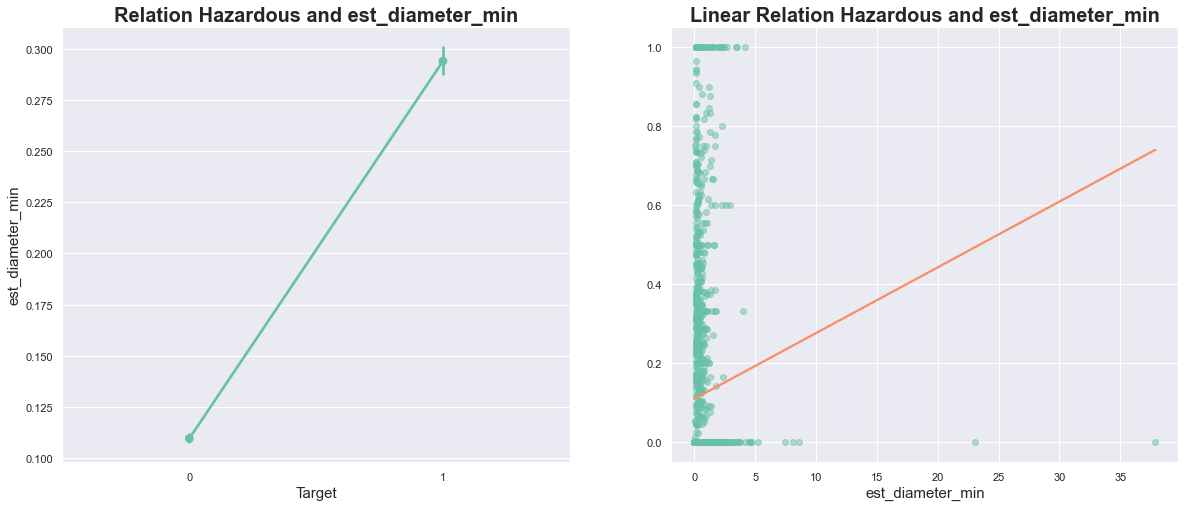

In [33]:
plot_target_relation(EST_DIAMETER_MIN)

In [ ]:
###############################################################
#   Log-Transformation
#   Scaling
###############################################################

## EST_DIAMETER_MAX

In [34]:
df[EST_DIAMETER_MAX].describe()

count    90836.000000
mean         0.284947
std          0.667491
min          0.001362
25%          0.043057
50%          0.108153
75%          0.320656
max         84.730541
Name: est_diameter_max, dtype: float64

In [35]:
df[EST_DIAMETER_MAX].value_counts(ascending=False)

0.078350    1130
0.065169    1058
0.051765     995
0.071456     988
0.049436     977
            ... 
0.019927       1
3.631115       1
0.243467       1
0.133242       1
0.244028       1
Name: est_diameter_max, Length: 1638, dtype: int64

In [36]:
df.sort_values(by=EST_DIAMETER_MAX, ascending=False).head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,Target
36418,2001036,1036 Ganymed (A924 UB),37.892650,84.730541,51496.923293,5.372124e+07,Earth,False,9.23,False,0
56533,2000433,433 Eros (A898 PA),23.043847,51.527608,21761.703426,3.120592e+07,Earth,False,10.31,False,0
37651,2000433,433 Eros (A898 PA),23.043847,51.527608,21402.705247,2.672952e+07,Earth,False,10.31,False,0
12709,2000433,433 Eros (A898 PA),23.043847,51.527608,15884.252623,5.468808e+07,Earth,False,10.31,False,0
72472,2001866,1866 Sisyphus (1972 XA),8.640820,19.321462,86394.013285,6.737501e+07,Earth,False,12.44,False,0
16895,2001866,1866 Sisyphus (1972 XA),8.640820,19.321462,96530.774890,7.402691e+07,Earth,False,12.44,False,0
21460,2004954,4954 Eric (1990 SQ),8.101305,18.115068,32852.598792,4.286086e+07,Earth,False,12.58,False,0
59334,2001627,1627 Ivar (1929 SH),7.456843,16.674007,37629.756403,4.810640e+07,Earth,False,12.76,False,0
54040,2001627,1627 Ivar (1929 SH),7.456843,16.674007,37802.191707,4.248551e+07,Earth,False,12.76,False,0
60218,2002212,2212 Hephaistos (1978 SB),5.230642,11.696071,135956.251475,4.478821e+07,Earth,False,13.53,False,0


Skew: 	 41.139951948962064


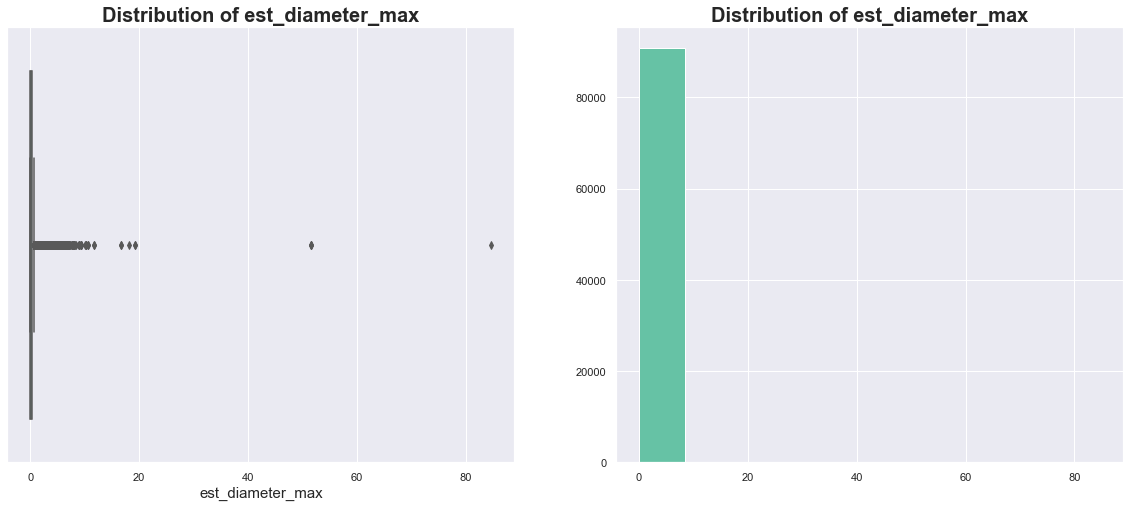

In [37]:
plot_dist(EST_DIAMETER_MAX)

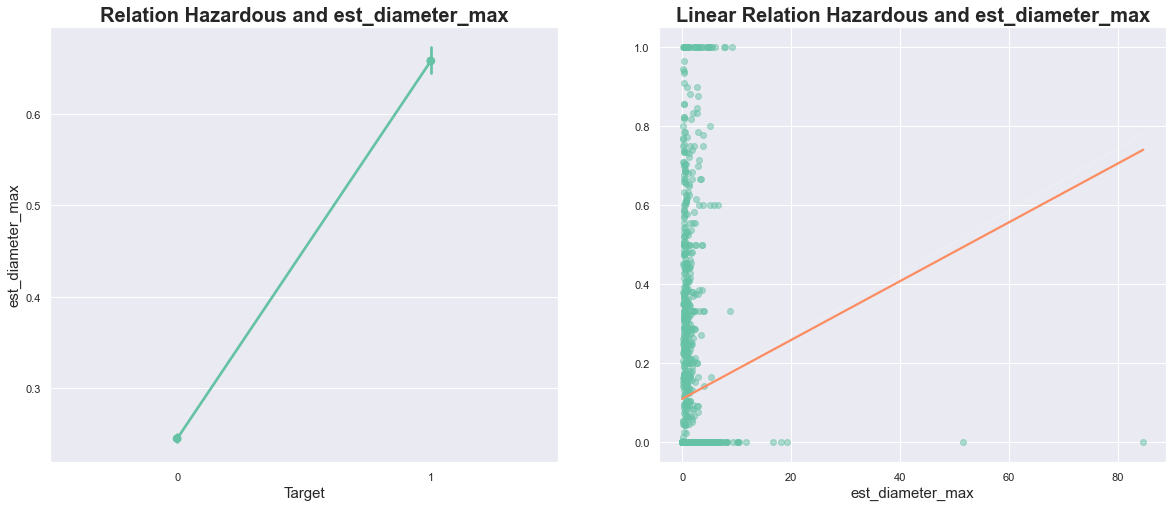

In [38]:
plot_target_relation(EST_DIAMETER_MAX)

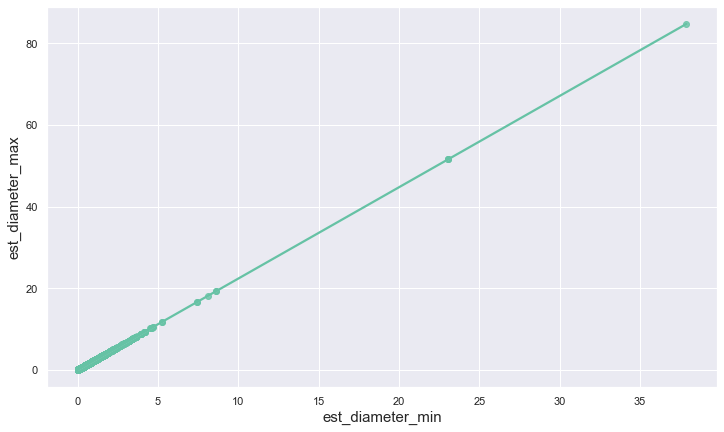

In [39]:
sns.regplot(x=EST_DIAMETER_MIN, y=EST_DIAMETER_MAX, data=df);

In [40]:
df[[EST_DIAMETER_MIN, EST_DIAMETER_MAX]].corr()

,est_diameter_min,est_diameter_max
est_diameter_min,1.0,1.0
est_diameter_max,1.0,1.0


In [ ]:
###############################################################
#   Drop this feature
###############################################################

## REL_VELOCITY

In [57]:
df[REL_VELOCITY].describe()

count     90836.000000
mean      48066.918918
std       25293.296961
min         203.346433
25%       28619.020645
50%       44190.117890
75%       62923.604633
max      236990.128088
Name: relative_velocity, dtype: float64

In [60]:
df[REL_VELOCITY].sort_values(ascending=False).head(10)

57149    236990.128088
73482    228242.243467
76733    207168.668693
50018    194056.414989
867      193386.975218
29640    191176.458196
88928    187221.073334
30662    184152.061411
30672    184152.061330
26276    183551.907545
Name: relative_velocity, dtype: float64

Skew: 	 0.9051249321533839


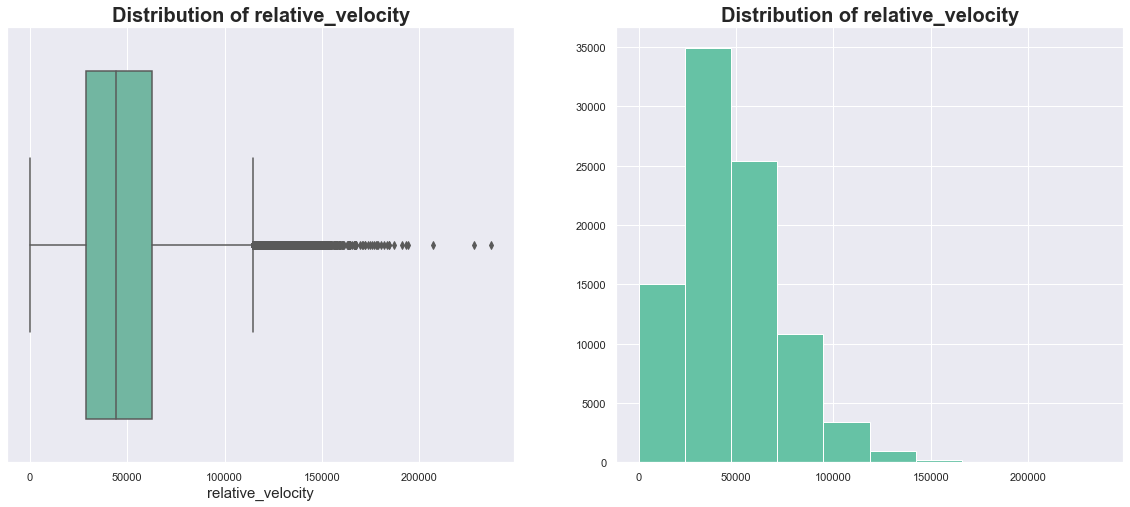

In [45]:
plot_dist(REL_VELOCITY)

REL_VELOCITY => LOG_TRANSFORMATION + SCALING

In [ ]:
###############################################################
#   Log-Transformation
#   Scaling
###############################################################

## MISS_DISTANCE

In [61]:
df[MISS_DISTANCE].describe()

count    9.083600e+04
mean     3.706655e+07
std      2.235204e+07
min      6.745533e+03
25%      1.721082e+07
50%      3.784658e+07
75%      5.654900e+07
max      7.479865e+07
Name: miss_distance, dtype: float64

Skew: 	 -0.04270598169888323


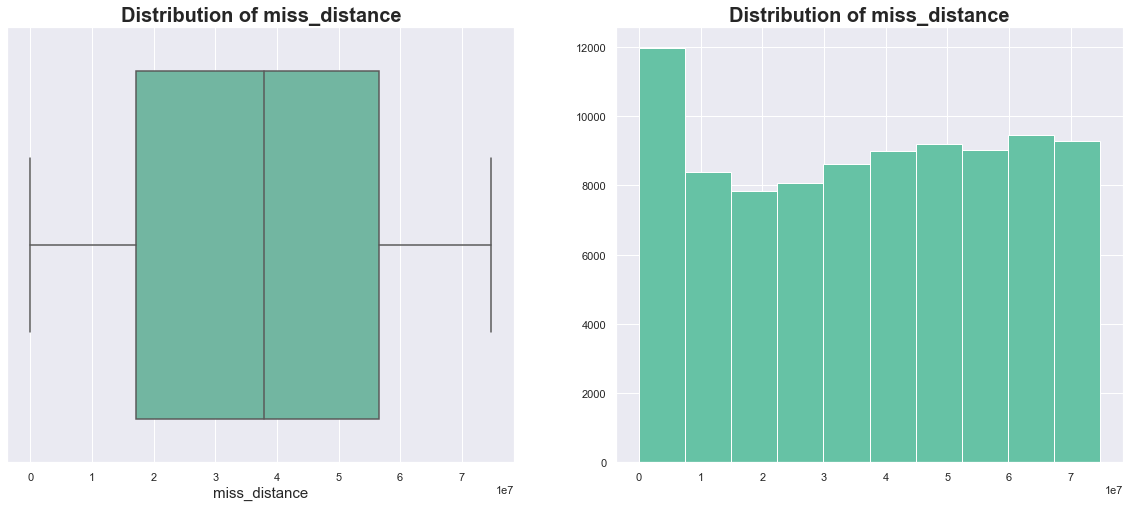

In [46]:
plot_dist(MISS_DISTANCE)

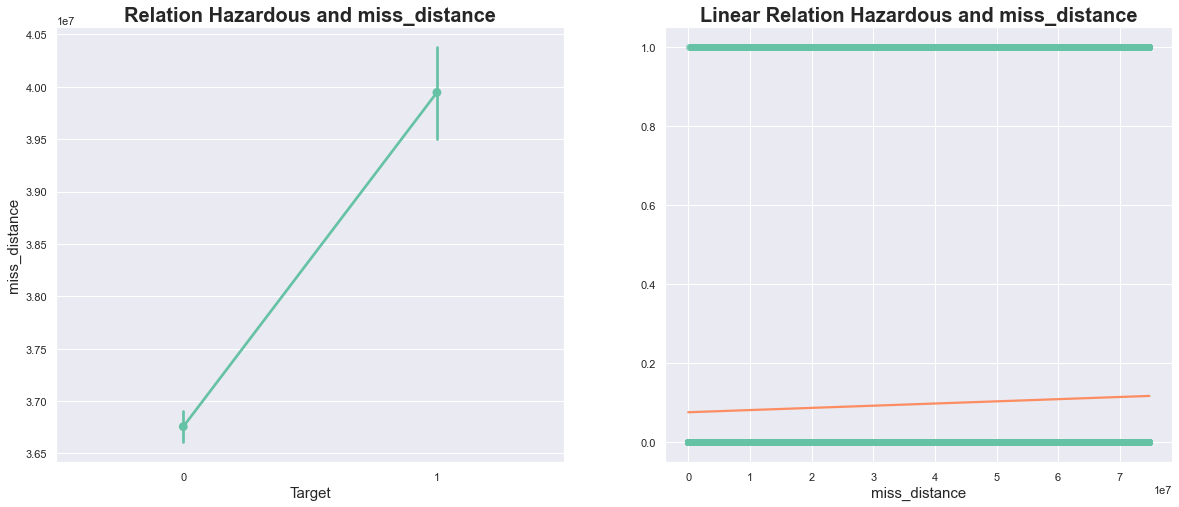

In [47]:
plot_target_relation(MISS_DISTANCE)

In [ ]:
###############################################################
#   Scaling
###############################################################

## ORBITING_BODY

In [64]:
df[ORBITING_BODY].value_counts()

Earth    90836
Name: orbiting_body, dtype: int64

In [ ]:
###############################################################
#   Drop this feature
###############################################################

## SENTRY_OBJECT

In [65]:
df[SENTRY_OBJECT].value_counts()

False    90836
Name: sentry_object, dtype: int64

In [ ]:
###############################################################
#   Drop this feature
###############################################################

## ABS_MAGNITUDE

In [66]:
df[ABS_MAGNITUDE].describe()

count    90836.000000
mean        23.527103
std          2.894086
min          9.230000
25%         21.340000
50%         23.700000
75%         25.700000
max         33.200000
Name: absolute_magnitude, dtype: float64

Skew: 	 -0.13741956613464948


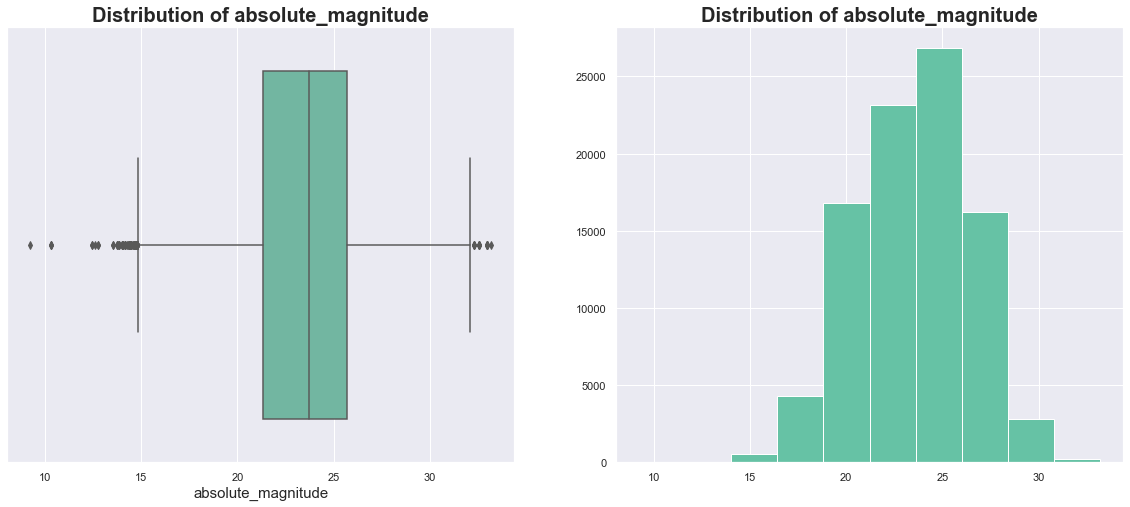

In [48]:
plot_dist(ABS_MAGNITUDE)

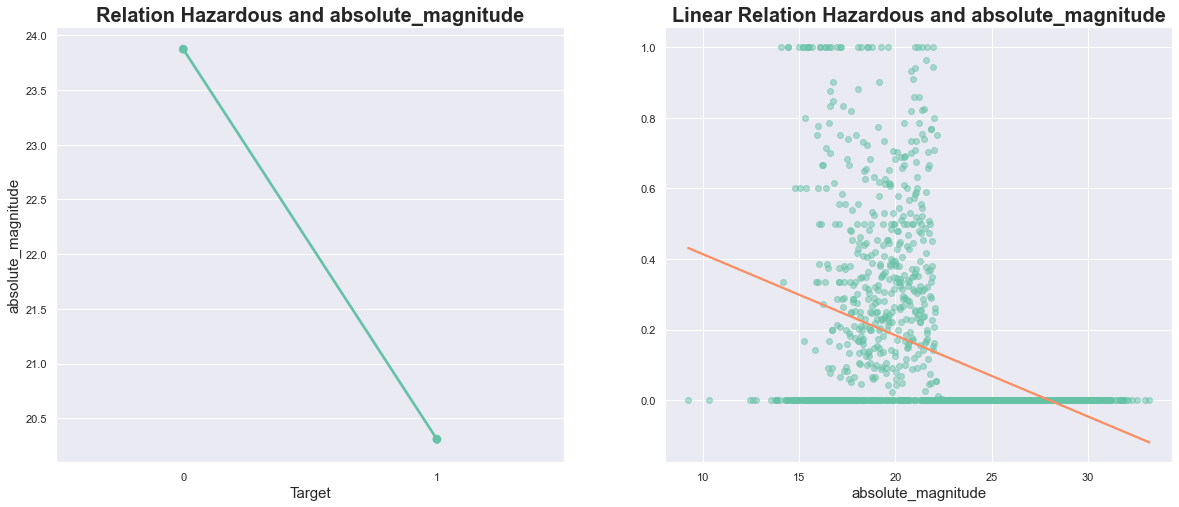

In [49]:
plot_target_relation(ABS_MAGNITUDE)

In [50]:
###############################################################
#   Log-Transformation
#   Scaling
###############################################################

# Final Overview

In [69]:
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


# Conclusion - EDA

#### DROP COLUMNS

- id
- name
- orbiting_body
- sentry_object
- miss_distance

#### LOG-TRANSFORMATION

- est_diameter_min
- est_diameter_max
- relative_velocity

#### SCALE

- miss_distance
- absolute_magnitude
- est_diameter_min
- est_diameter_max
- relative_velocity

#### GENERAL

- oversample the target